Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [11]:
import pandas as pd

bikesDataFrame = pd.read_csv('data/bikesData.csv', sep=',')
fsquareDataFrame = pd.read_csv('data/fsquareData.csv', sep=',')

In [23]:
#Joining the data
totalData = pd.DataFrame.merge(bikesDataFrame, fsquareDataFrame, how='inner', on=['latitude','longitude'])
totalData.to_csv('data/totalData.csv', sep=',', index=False)

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


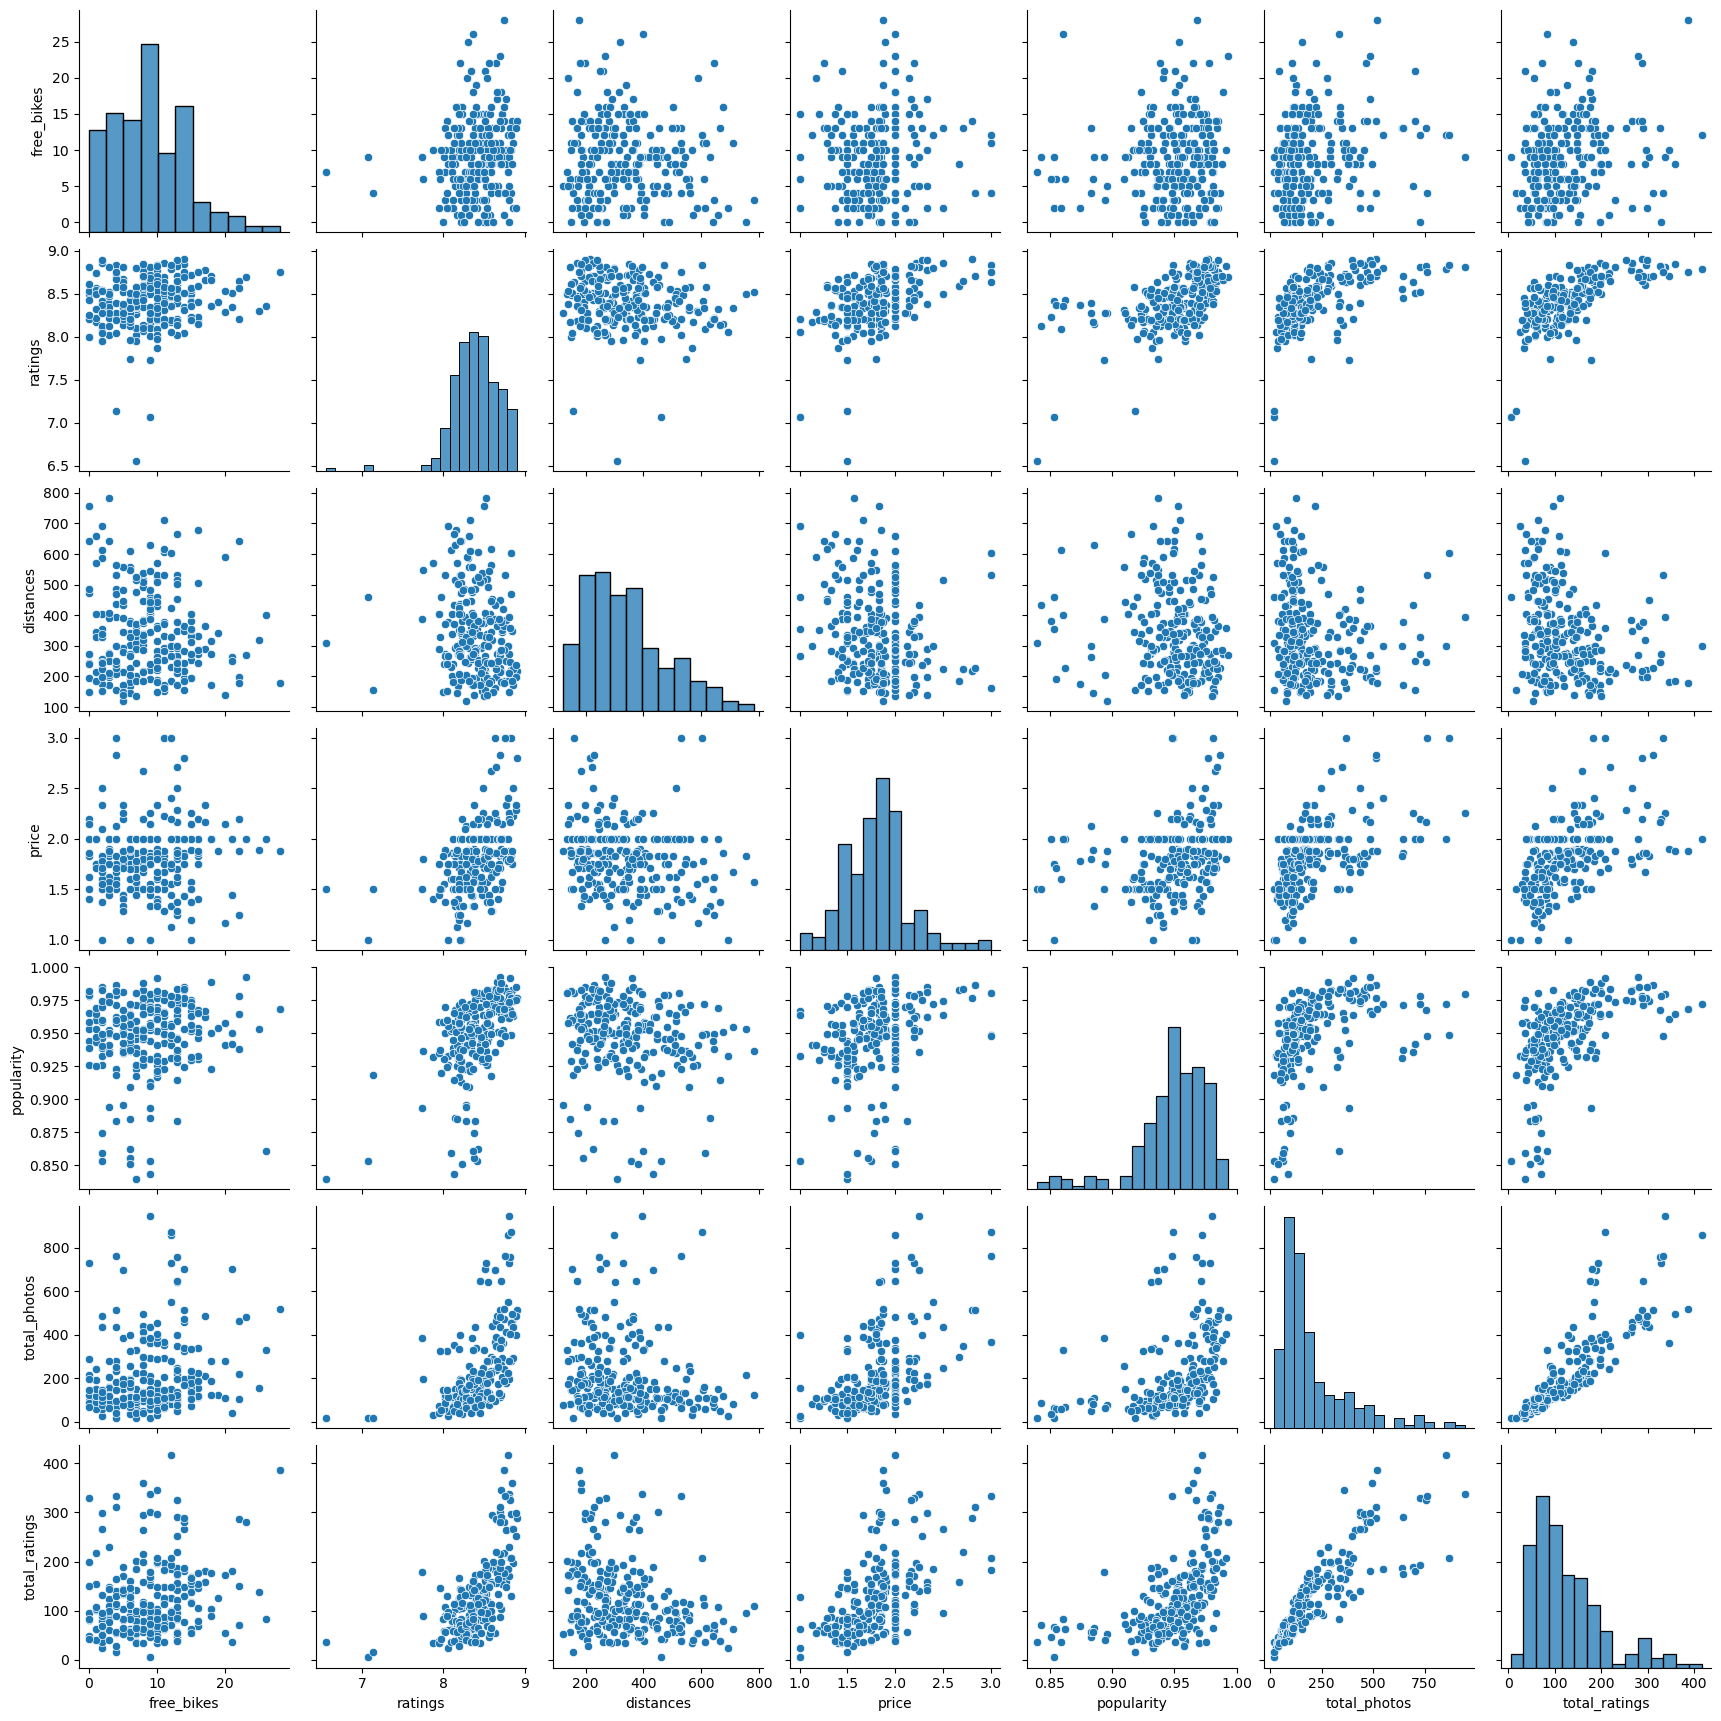

In [20]:
#Plotting and looking at some correlation coefficients for variables
import seaborn as sns
import matplotlib.pyplot as plt

trunTotal = totalData.drop(columns = ['names', 'locations'])
averages = trunTotal.groupby(['latitude', 'longitude']).mean()

sns.pairplot(averages)
plt.savefig('images/averageCorrelationPlot.png')
plt.show()

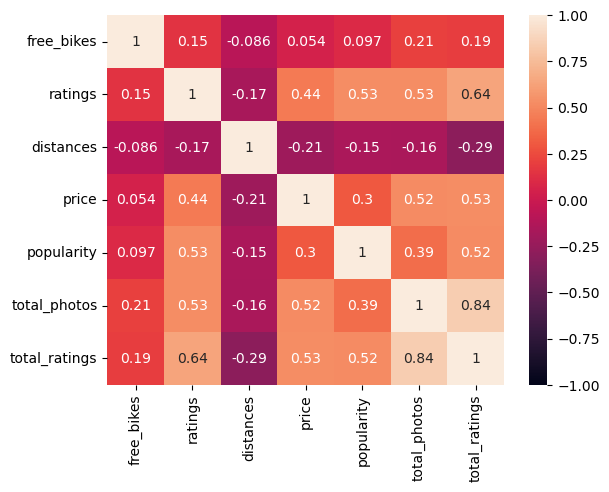

In [21]:
sns.heatmap(averages.corr(), vmin=-1, vmax=1, annot=True)
plt.savefig('images/averageCorrelationHeatmap.png')
plt.show()

I decided to take the averages of each variable and group by the latitude and the longitude to get an idea of how these variables correlate with eachother. Looking at the pairplot I see that the amount
of free bikes doesn't seem to strongly correlate with any other variables. The correlation heatmap confirms this although there are small correlations between the number of free bikes, total photos and the amount ratings made at the location.

On the other hand popularity and total ratings do seem to be correlated based on the graphs which would make sense since the more people that go to place the more ratings will be written.

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [22]:
import sqlite3
from sqlite3 import Error
import math

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

connection = create_connection("data/sm_app.sqlite")

#Creating a table for the data
create_FourSquarePOI_table = """
CREATE TABLE IF NOT EXISTS FourSquarePOI (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  names TEXT NOT NULL,
  locations TEXT NOT NULL,
  free_bikes INTEGER,
  ratings NUMERIC NULL,
  latitude NUMERIC,
  longitude NUMERIC,
  price NUMERIC,
  popularity NUMERIC,
  total_ratings NUMERIC,
  total_photos NUMERIC,
  distance NUMERIC
);
"""

execute_query(connection, create_FourSquarePOI_table)  

#Inputting all the data from each row and making sure there are no NaNs but NULLs instead since sql can handle those
for index, row in totalData.iterrows():
    for key in row.keys():
        if type(row[key]) != str:
            if math.isnan(row[key]):
                row[key] = 'Null'
    create_data = """
    INSERT INTO
      FourSquarePOI (names, locations, free_bikes, ratings, latitude, longitude, price, popularity, total_ratings, total_photos, distance)
    VALUES
      (" """ + str(row["names"]) + """ ", '""" + str(row["locations"]) + "', "+ str(row["free_bikes"]) + ", "+ str(row["ratings"]) + ", "+ str(row["latitude"]) + ", "+ str(row["longitude"]) + ", "+ str(row["price"]) + """
      , """+ str(row["popularity"]) + ", " + str(row["total_ratings"]) + ", "+ str(row["total_photos"]) + ", "+ str(row["distances"]) + """); """
    
    execute_query(connection, create_data)

Connection to SQLite DB successful
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query execute

Look at the data before and after the join to validate your data.

In [14]:
print(totalData)
print(bikesDataFrame)
print(fsquareDataFrame)
#The dimensions make sense since they join to the largest data frame.

       latitude   longitude  free_bikes                                names  \
0     49.262487 -123.114397          21                        Marulilu Cafe   
1     49.262487 -123.114397          21         La Taqueria Pinche Taco Shop   
2     49.262487 -123.114397          21                          Whole Foods   
3     49.262487 -123.114397          21              Elysian Coffee Broadway   
4     49.262487 -123.114397          21               Rogue Kitchen & Wetbar   
...         ...         ...         ...                                  ...   
2428  49.265442 -123.187738           9                   Browns Socialhouse   
2429  49.265442 -123.187738           9                    Yuji's From Japan   
2430  49.265442 -123.187738           9                     Beyond Bread Ltd   
2431  49.265442 -123.187738           9                 Banyen Books & Sound   
2432  49.265442 -123.187738           9  Aphrodite's Organic Cafe & Pie Shop   

      ratings                          